In [1]:
pwd

'/content'

In [2]:
cd /content/drive/MyDrive/Project/

/content/drive/MyDrive/Project


In [3]:
pwd

'/content/drive/MyDrive/Project'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False,shear_range=0.2)
test_datagen=ImageDataGenerator(rescale=1)

In [5]:
pwd

'/content/drive/MyDrive/Project'

In [6]:
ls

 app.ipynb                'precautions - fruits.xlsx'   uploads/
'Dataset Plant Disease'/  'precautions - veg.xlsx'      vegetable.h5
 FRP.zip                   static/
 fruit.h5                  templates/


In [7]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Project/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set',target_size=(128,128),class_mode='categorical',batch_size=16)

Found 11386 images belonging to 9 classes.


In [8]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Project/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set',target_size=(128,128),class_mode='categorical',batch_size=16)

Found 3416 images belonging to 9 classes.


In [9]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [10]:
x_test.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPool2D,Flatten


In [12]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

In [13]:
model.add(Dense(units=300,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units= 150,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units= 75,kernel_initializer='uniform',activation='relu'))

In [14]:
model.add(Dense(units= 9,activation='softmax',kernel_initializer='uniform'))

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
len(x_train)

712

In [17]:
len(x_test)

214

In [ ]:
model.fit_generator(x_train,steps_per_epoch=89,validation_data=x_test,validation_steps=27,epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
89/89 [==============================] - 445s 5s/step - loss: 1.9883 - accuracy: 0.2535 - val_loss: 136.1804 - val_accuracy: 0.3657
Epoch 2/10
89/89 [==============================] - 380s 4s/step - loss: 1.6344 - accuracy: 0.3792 - val_loss: 110.6802 - val_accuracy: 0.5000
Epoch 3/10
89/89 [==============================] - 336s 4s/step - loss: 1.4849 - accuracy: 0.4558 - val_loss: 146.8473 - val_accuracy: 0.3449
Epoch 4/10
89/89 [==============================] - 283s 3s/step - loss: 1.3040 - accuracy: 0.5323 - val_loss: 222.0570 - val_accuracy: 0.4306
Epoch 5/10
89/89 [==============================] - 250s 3s/step - loss: 1.1828 - accuracy: 0.5779 - val_loss: 217.1618 - val_accuracy: 0.4537
Epoch 6/10
89/89 [==============================] - 220s 2s/step - loss: 1.0293 - accuracy: 0.6222 - val_loss: 509.9269 - val_accuracy: 0.3426
Epoch 7/10
89/89 [==============================] - 194s 2s/step - loss: 0.9652 - accuracy: 0.6461 - val_loss: 701.9461 - val_accuracy: 0.2801

In [18]:
ls

 app.ipynb                'precautions - fruits.xlsx'   uploads/
'Dataset Plant Disease'/  'precautions - veg.xlsx'      vegetable.h5
 FRP.zip                   static/
 fruit.h5                  templates/


In [ ]:
model.save('vegetable.h5')

In [19]:
pwd

'/content/drive/MyDrive/Project'

In [20]:
cd /content/drive/MyDrive/Project/

/content/drive/MyDrive/Project


In [21]:
pwd

'/content/drive/MyDrive/Project'

In [22]:
ls

 app.ipynb                'precautions - fruits.xlsx'   uploads/
'Dataset Plant Disease'/  'precautions - veg.xlsx'      vegetable.h5
 FRP.zip                   static/
 fruit.h5                  templates/


In [23]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np

In [24]:
model = load_model('vegetable.h5')

In [25]:
img = image.load_img('/content/drive/MyDrive/Project/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/adbfa5e7-23a5-4df0-9cae-1e54115619cb___NREC_B.Spot 1786.JPG',target_size=(128,128))

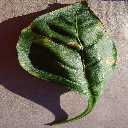

In [26]:
img

In [27]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)

In [28]:
x

array([[[[155., 133., 119.],
         [161., 139., 125.],
         [160., 138., 124.],
         ...,
         [ 94.,  70., 130.],
         [108.,  84., 144.],
         [ 86.,  62., 122.]],

        [[165., 143., 129.],
         [156., 134., 120.],
         [159., 137., 123.],
         ...,
         [117., 103., 103.],
         [150., 136., 136.],
         [ 96.,  82.,  82.]],

        [[157., 135., 121.],
         [172., 150., 136.],
         [145., 123., 109.],
         ...,
         [ 91.,  80.,  62.],
         [164., 153., 135.],
         [125., 114.,  96.]],

        ...,

        [[156., 138., 136.],
         [138., 120., 118.],
         [155., 137., 135.],
         ...,
         [174., 160., 159.],
         [150., 136., 135.],
         [174., 160., 159.]],

        [[152., 134., 132.],
         [147., 129., 127.],
         [147., 129., 127.],
         ...,
         [157., 143., 142.],
         [155., 141., 140.],
         [171., 157., 156.]],

        [[128., 110., 108.],
       

In [29]:
y=np.argmax(model.predict(x),axis=1)

In [30]:
y

array([8])

In [31]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [32]:
index=['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']

In [33]:
index[y[0]]

'Tomato___Septoria_leaf_spot'

In [34]:
img = image.load_img('/content/drive/MyDrive/Project/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Tomato___Bacterial_spot/b0049dbf-cdef-4a85-b6e1-b37ed6bc4cfa___UF.GRC_BS_Lab Leaf 0696.JPG',target_size=(128,128))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Tomato___Septoria_leaf_spot'